In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('../src/')

In [2]:
from GenerativeSignaler import SignalerZero
from consistentSignalChecks import signalIsConsistent_Grosse
from OverloadedReceiver import ReceiverZero
from OverloadedSignaler import SignalerOne
from grosseConstruction import *
from mindConstruction import *

# Extended Signal Space

In [53]:
#utility
costD = [{'L':-4, 'R':-1, 'n':0},{'L':-2, 'R':-2, 'n':0}]
rewardValue = 10
getUtility = ActionUtility_Grosse(costD, rewardValue)

#p(a|w,g) function
a = .4
getActionPDF = ActionDistributionGivenWorldGoal_Grosse(alpha = a, actionUtilityFunction=getUtility, softmax=True)

#p(mind) function
getMind = GenerateMind(getWorldProbabiltiy_Uniform, getDesireProbability_Uniform, getGoalGivenWorldAndDesire_Grosse, getActionPDF)

#condition parameters
handsFreeCondition = {'worlds': ['LR'], 'desires': [1], 'intentions': ['n', 'L', 'R', 'LR', 'either'], 'actions': [('n', 'n'), ('L', 'n'), ('R', 'n'), ('n', 'L'), ('n', 'R'), ('L', 'R'), ('R', 'L')]}

signalCategoryPrior = {'1':1}
signalSpace = ['help', 'null', 'help Left', 'help Right', 'help either']

#signaling costs
getSignalCost = SignalCost_Grosse(.05)

#inference
getGenerativeSignaler = SignalerZero(signalSpace, signalIsConsistent_Grosse)
getReceiverZero = ReceiverZero(commonGroundDictionary=handsFreeCondition, constructMind=getMind, getSignalerZero=getGenerativeSignaler, signalCategoryPrior=signalCategoryPrior)
getSignalerOne = SignalerOne(a, signalSpace, getUtility, getReceiverZero, getSignalCost)


# No cost inference
getGenerativeSignalerNoCost = SignalerZero(signalSpace, signalIsConsistent_Grosse)
getReceiverZeroNoCost = ReceiverZero(commonGroundDictionary=handsFreeCondition, constructMind=getMind, getSignalerZero=getGenerativeSignalerNoCost, signalCategoryPrior=signalCategoryPrior)
getSignalerOneNoCost = SignalerOne(a, signalSpace, getUtility, getReceiverZeroNoCost)

In [48]:
goal = 'L'

In [54]:
round(getSignalerOne({'worlds':'LR', 'intentions':goal}), 5)

,probabilities
signals,
help,0.23603
null,0.04450
help Left,0.55438
help Right,0.02854
help either,0.13654


In [4]:
getGenerativeSignalerNoCost(getMind(handsFreeCondition), '1')

p(signal|mind,c)
worlds desires intentions actions signals                      
LR     1       L          (L, R)  help                      1.0
                                  null                      0.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (L, n)  help                      0.0
                                  null                      1.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (R, L)  help                      0.5
                                  null                      0.0
                                  help Left                 0.5
                                  help Right                0.0
                                  help either               0.0
                          (R, n)  help                      0.0
                                  null                      1.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (n, L)  help                      0.5
                                  null                      0.0
                                  help Left                 0.5
                                  help Right                0.0
                                  help either               0.0
                          (n, R)  help                      1.0
                                  null                      0.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
...                                                         ...
               n          (L, n)  help                      0.0
                                  null                      1.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (R, L)  help                      0.0
                                  null                      0.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (R, n)  help                      0.0
                                  null                      1.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (n, L)  help                      0.0
                                  null                      0.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (n, R)  help                      0.0
                                  null                      0.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (n, n)  help                      0.0
                                  null                      1.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0

[175 rows x 1 

In [5]:
getGenerativeSignaler(getMind(handsFreeCondition), '1')

p(signal|mind,c)
worlds desires intentions actions signals                      
LR     1       L          (L, R)  help                      1.0
                                  null                      0.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (L, n)  help                      0.0
                                  null                      1.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (R, L)  help                      0.5
                                  null                      0.0
                                  help Left                 0.5
                                  help Right                0.0
                                  help either               0.0
                          (R, n)  help                      0.0
                                  null                      1.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (n, L)  help                      0.5
                                  null                      0.0
                                  help Left                 0.5
                                  help Right                0.0
                                  help either               0.0
                          (n, R)  help                      1.0
                                  null                      0.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
...                                                         ...
               n          (L, n)  help                      0.0
                                  null                      1.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (R, L)  help                      0.0
                                  null                      0.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (R, n)  help                      0.0
                                  null                      1.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (n, L)  help                      0.0
                                  null                      0.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (n, R)  help                      0.0
                                  null                      0.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (n, n)  help                      0.0
                                  null                      1.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0

[175 rows x 1 

## Signal Heard by Receiver

In [6]:
observedSignal = 'help'

# Action and Goal Distribution with Signaling Costs

In [7]:
getReceiverZero(observedSignal)

p(mind|signal)
worlds desires intentions actions                
LR     1       L          (L, R)         0.055709
                          (L, n)         0.000000
                          (R, L)         0.092481
                          (R, n)         0.000000
                          (n, L)         0.137965
                          (n, R)         0.005054
                          (n, n)         0.000000
               LR         (L, R)         0.046374
                          (L, n)         0.000000
                          (R, L)         0.153966
                          (R, n)         0.000000
                          (n, L)         0.031085
                          (n, R)         0.031085
                          (n, n)         0.000000
               R          (L, R)         0.019547
                          (L, n)         0.000000
                          (R, L)         0.129797
                          (R, n)         0.000000
                          (n, L)         0.003547
                          (n, R)         0.096817
                          (n, n)         0.000000
               either     (L, R)         0.013818
                          (L, n)         0.000000
                          (R, L)         0.045876
                          (R, n)         0.000000
                          (n, L)         0.068439
                          (n, R)         0.068439
                          (n, n)         0.000000
               n          (L, R)         0.000000
                          (L, n)         0.000000
                          (R, L)         0.000000
                          (R, n)         0.000000
                          (n, L)         0.000000
                          (n, R)         0.000000
                          (n, n)         0.000000

In [8]:
getReceiverZeroNoCost(observedSignal)

p(mind|signal)
worlds desires intentions actions                
LR     1       L          (L, R)         0.055709
                          (L, n)         0.000000
                          (R, L)         0.092481
                          (R, n)         0.000000
                          (n, L)         0.137965
                          (n, R)         0.005054
                          (n, n)         0.000000
               LR         (L, R)         0.046374
                          (L, n)         0.000000
                          (R, L)         0.153966
                          (R, n)         0.000000
                          (n, L)         0.031085
                          (n, R)         0.031085
                          (n, n)         0.000000
               R          (L, R)         0.019547
                          (L, n)         0.000000
                          (R, L)         0.129797
                          (R, n)         0.000000
                          (n, L)         0.003547
                          (n, R)         0.096817
                          (n, n)         0.000000
               either     (L, R)         0.013818
                          (L, n)         0.000000
                          (R, L)         0.045876
                          (R, n)         0.000000
                          (n, L)         0.068439
                          (n, R)         0.068439
                          (n, n)         0.000000
               n          (L, R)         0.000000
                          (L, n)         0.000000
                          (R, L)         0.000000
                          (R, n)         0.000000
                          (n, L)         0.000000
                          (n, R)         0.000000
                          (n, n)         0.000000

In [9]:
actionPosterior = pd.DataFrame(getReceiverZero(observedSignal).groupby(level=['actions']).sum())
actionPosterior

,p(mind|signal)
actions,
"(L, R)",0.135448
"(L, n)",0.000000
"(R, L)",0.422120
"(R, n)",0.000000
"(n, L)",0.241037
"(n, R)",0.201396
"(n, n)",0.000000


In [10]:
goalPosterior = getReceiverZero(observedSignal).groupby(level=['intentions']).sum()
goalPosterior

,p(mind|signal)
intentions,
L,0.291210
LR,0.262510
R,0.249708
either,0.196573
n,0.000000


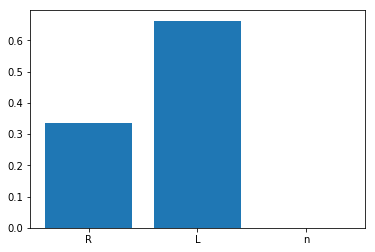

In [11]:
# Plot of Marginalized action posterior for signal receiver 
dict_actionPosterior = actionPosterior.T.to_dict()
you_actionPosterior = {'R':0, 'L':0, 'n':0}
for key, value in dict_actionPosterior.items():
    you_actionPosterior[key[1]] = you_actionPosterior[key[1]] + value['p(mind|signal)']
plt.bar(range(len(you_actionPosterior)), list(you_actionPosterior.values()), align='center')
plt.xticks(range(len(you_actionPosterior)), list(you_actionPosterior.keys()))
plt.show()

# Action and Goal Distribution with Signaling Costs

In [12]:
actionPosteriorNoCost = pd.DataFrame(getReceiverZeroNoCost(observedSignal).groupby(level=['actions']).sum())
actionPosteriorNoCost

,p(mind|signal)
actions,
"(L, R)",0.135448
"(L, n)",0.000000
"(R, L)",0.422120
"(R, n)",0.000000
"(n, L)",0.241037
"(n, R)",0.201396
"(n, n)",0.000000


In [13]:
goalPosteriorNoCost = getReceiverZeroNoCost(observedSignal).groupby(level=['intentions']).sum()
goalPosteriorNoCost

,p(mind|signal)
intentions,
L,0.291210
LR,0.262510
R,0.249708
either,0.196573
n,0.000000


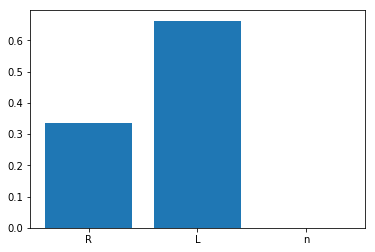

In [14]:
# Plot of Marginalized action posterior for signal receiver 
dict_actionPosteriorNoCost = actionPosteriorNoCost.T.to_dict()
you_actionPosteriorNoCost = {'R':0, 'L':0, 'n':0}
for key, value in dict_actionPosteriorNoCost.items():
    you_actionPosteriorNoCost[key[1]] = you_actionPosteriorNoCost[key[1]] + value['p(mind|signal)']
plt.bar(range(len(you_actionPosteriorNoCost)), list(you_actionPosteriorNoCost.values()), align='center')
plt.xticks(range(len(you_actionPosteriorNoCost)), list(you_actionPosteriorNoCost.keys()))
plt.show()

## Signaler Perspective

In [15]:
currentgoal = 'L'

In [16]:
round(getSignalerOneNoCost({'worlds':'LR', 'intentions':currentgoal}), 3)

,probabilities
signals,
help,0.219
null,0.038
help Left,0.568
help Right,0.030
help either,0.146


In [17]:
round(getSignalerOne({'worlds':'LR', 'intentions':currentgoal}), 3)

,probabilities
signals,
help,0.393
null,0.152
help Left,0.375
help Right,0.016
help either,0.064


In [18]:
round(getMind(handsFreeCondition), 3)

p(mind)
worlds desires intentions actions         
LR     1       L          (L, R)     0.017
                          (L, n)     0.037
                          (R, L)     0.056
                          (R, n)     0.002
                          (n, L)     0.083
                          (n, R)     0.002
                          (n, n)     0.003
               LR         (L, R)     0.028
                          (L, n)     0.008
                          (R, L)     0.093
                          (R, n)     0.028
                          (n, L)     0.019
                          (n, R)     0.019
                          (n, n)     0.006
               R          (L, R)     0.012
                          (L, n)     0.000
                          (R, L)     0.039
                          (R, n)     0.087
                          (n, L)     0.001
                          (n, R)     0.058
                          (n, n)     0.002
               either     (L, R)     0.008
                          (L, n)     0.019
                          (R, L)     0.028
                          (R, n)     0.061
                          (n, L)     0.041
                          (n, R)     0.041
                          (n, n)     0.002
               n          (L, R)     0.006
                          (L, n)     0.013
                          (R, L)     0.019
                          (R, n)     0.042
                          (n, L)     0.028
                          (n, R)     0.028
                          (n, n)     0.063

In [19]:
round(getGenerativeSignaler(getMind(handsFreeCondition), '1'), 3)

p(signal|mind,c)
worlds desires intentions actions signals                      
LR     1       L          (L, R)  help                      1.0
                                  null                      0.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (L, n)  help                      0.0
                                  null                      1.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (R, L)  help                      0.5
                                  null                      0.0
                                  help Left                 0.5
                                  help Right                0.0
                                  help either               0.0
                          (R, n)  help                      0.0
                                  null                      1.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (n, L)  help                      0.5
                                  null                      0.0
                                  help Left                 0.5
                                  help Right                0.0
                                  help either               0.0
                          (n, R)  help                      1.0
                                  null                      0.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
...                                                         ...
               n          (L, n)  help                      0.0
                                  null                      1.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (R, L)  help                      0.0
                                  null                      0.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (R, n)  help                      0.0
                                  null                      1.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (n, L)  help                      0.0
                                  null                      0.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (n, R)  help                      0.0
                                  null                      0.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0
                          (n, n)  help                      0.0
                                  null                      1.0
                                  help Left                 0.0
                                  help Right                0.0
                                  help either               0.0

[175 rows x 1 

In [20]:
getReceiverZero('help')

p(mind|signal)
worlds desires intentions actions                
LR     1       L          (L, R)         0.055709
                          (L, n)         0.000000
                          (R, L)         0.092481
                          (R, n)         0.000000
                          (n, L)         0.137965
                          (n, R)         0.005054
                          (n, n)         0.000000
               LR         (L, R)         0.046374
                          (L, n)         0.000000
                          (R, L)         0.153966
                          (R, n)         0.000000
                          (n, L)         0.031085
                          (n, R)         0.031085
                          (n, n)         0.000000
               R          (L, R)         0.019547
                          (L, n)         0.000000
                          (R, L)         0.129797
                          (R, n)         0.000000
                          (n, L)         0.003547
                          (n, R)         0.096817
                          (n, n)         0.000000
               either     (L, R)         0.013818
                          (L, n)         0.000000
                          (R, L)         0.045876
                          (R, n)         0.000000
                          (n, L)         0.068439
                          (n, R)         0.068439
                          (n, n)         0.000000
               n          (L, R)         0.000000
                          (L, n)         0.000000
                          (R, L)         0.000000
                          (R, n)         0.000000
                          (n, L)         0.000000
                          (n, R)         0.000000
                          (n, n)         0.000000

In [21]:
df = getReceiverZero('help').loc[getReceiverZero('help')['p(mind|signal)'] > 10E-5]

In [22]:
df2 = df.reset_index(level=['worlds', 'desires'], drop=True)

In [23]:
df2

p(mind|signal)
intentions actions                
L          (L, R)         0.055709
           (R, L)         0.092481
           (n, L)         0.137965
           (n, R)         0.005054
LR         (L, R)         0.046374
           (R, L)         0.153966
           (n, L)         0.031085
           (n, R)         0.031085
R          (L, R)         0.019547
           (R, L)         0.129797
           (n, L)         0.003547
           (n, R)         0.096817
either     (L, R)         0.013818
           (R, L)         0.045876
           (n, L)         0.068439
           (n, R)         0.068439

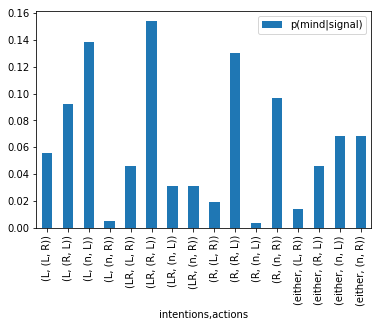

In [24]:

import pandas as pd
df2.plot(kind = 'bar')
plt.show()

In [30]:
goal = 'L'

In [25]:
round(getSignalerOne({'worlds':'LR', 'intentions':goal}), 3)

,probabilities
signals,
help,0.393
null,0.152
help Left,0.375
help Right,0.016
help either,0.064


In [32]:
round(getSignalerOneNoCost({'worlds':'LR', 'intentions':goal}), 5)

,probabilities
signals,
help,0.21874
null,0.03807
help Left,0.56781
help Right,0.02982
help either,0.14556
